# Project 08: Epidemium - Exploratory Data Analysis
## Bloc n°6 - Jedha - dsmft - Paris14
### Joseph Abitbol & Nicolas Hegerle

## Library imports

In [7]:
#import the necessary libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

import plotly.express as px
import seaborn as sns
sns.set_theme(style = 'darkgrid')
import matplotlib.pyplot as plt

In [8]:
#load the train data for verification
data = pd.read_csv("raw_data/avatarsV2_train.csv", parse_dates=[3,4,6])

print("Shape and head of the dataframe:\n")
print("Dataset has {} rows and {} columns.".format(data.shape[0], data.shape[1]))
display(data.head())


Shape and head of the dataframe:

Dataset has 52 rows and 17 columns.


,id,OMS,sexe (0=F 1=M),DDN,Date biopsie,Age au diag,Deces Code,Code recidive,localisation,RNAscope,T,N,M,Tabac,Alcool,Data,OS
0,abf1b4,1,1,1954-06-17,2013-08-10,59,0,0,Oropharynx,2,4,2b,0,3,1,Image + clinical,84
1,a5969b,1,1,1937-02-09,2014-09-06,77,1,0,Oropharynx,1,4,2c,1,2,1,Image + clinical,24
2,aa21da,1,1,1968-04-09,2013-03-12,44,0,0,Oropharynx,2,3,3,0,3,1,Image + clinical,47
3,b075a7,1,1,1947-02-10,2014-11-08,67,1,0,Oropharynx,1,2,2c,0,2,1,Image + clinical,9
4,b2e232,1,1,1942-08-03,2014-04-23,71,0,1,Oropharynx,1,4,2b,1,2,0,Image + clinical,37


### <ins>Description of the features / target:  </ins>

**<ins><font size = "4">Features:</font></ins>**

-  **<ins>OMS (integer):</ins>** score for the general condition of the patient. OMS ∈ [0,4]. the higher the score the worse the condition. 
-  **<ins>Sexe (encoded):</ins>** 1=male or 0=female. 
-  **<ins>ddn (date):</ins>** date of birth. 
-  **<ins>date biospsie (date):</ins>** date of the biopsy. 
-  **<ins>age au diag (integer):</ins>** age of the patient at the time of the diagnostic. 
-  **<ins>deces code (encoded):</ins>** whether the patient died or not  
-  **<ins>code recidive (encoded):</ins>** recurrence of the cancer or not  
-  **<ins>localisation (string):</ins>** localization of the cancer. In our case only **```Oropharynx```**.
-  **<ins>rnascope (integer):</ins>** quantitative evaluation score for HPV E6/E7 oncoprotein expression. RNA_scope ∈ [0,2]
-  **<ins>t (integer):</ins>** **```Tumor```**. T ∈ [1,4]. T ∈ [1,2] <=> small tumor, T ∈ [3,4] <=> large tumor
-  **<ins>n (integer):</ins>** **```Node```**. Cervical metastatic nodes. N ∈ [0,3]. 0 = no lymph nodes invaded. 3 > 1 for lymph node invasion **```CLARIFY 2a, 2b, 2c```**
-  **<ins>m (encoded):</ins>** Distant **```Metastasis```** to another organ. Yes = 1 / No = 0. 
-  **<ins>tabac (integer):</ins>** Tabac ∈ [0,3]. Score correlated to frequence of smoking. 0 = none smoker, 1 <=> Score ∈ ]0, 10[ , 2 <=> Score ∈ [10, 20[ , **```CLARIFY 3 > 30?```**
-  **<ins>alcool (encoded):</ins>** Yes = 1 or No = 0
-  **<ins>data (string):</ins>** data available for the study

**<ins><font size = "4">Target value:</font></ins>**

-  **<ins>OS (integer):</ins>** **```Overall survival```** in months from date of diagnosis to the date of last news / death 


In [9]:
# lets change a few things in the dataframe
data.rename(columns = {col:col.lower().replace(' ', '_') for col in data.columns}, inplace = True)
data.rename(columns = {'sexe_(0=f_1=m)': 'sexe'}, inplace=True)
display(data.head())

,id,oms,sexe,ddn,date_biopsie,age_au_diag,deces_code,code_recidive,localisation,rnascope,t,n,m,tabac,alcool,data,os
0,abf1b4,1,1,1954-06-17,2013-08-10,59,0,0,Oropharynx,2,4,2b,0,3,1,Image + clinical,84
1,a5969b,1,1,1937-02-09,2014-09-06,77,1,0,Oropharynx,1,4,2c,1,2,1,Image + clinical,24
2,aa21da,1,1,1968-04-09,2013-03-12,44,0,0,Oropharynx,2,3,3,0,3,1,Image + clinical,47
3,b075a7,1,1,1947-02-10,2014-11-08,67,1,0,Oropharynx,1,2,2c,0,2,1,Image + clinical,9
4,b2e232,1,1,1942-08-03,2014-04-23,71,0,1,Oropharynx,1,4,2b,1,2,0,Image + clinical,37


In [10]:
print("\nInformation about the dataset:\n")
data = data.astype({'deces_code': 'int64'}) # change deces_code to int
display(data.info())


Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             52 non-null     object        
 1   oms            52 non-null     int64         
 2   sexe           52 non-null     int64         
 3   ddn            52 non-null     datetime64[ns]
 4   date_biopsie   52 non-null     datetime64[ns]
 5   age_au_diag    52 non-null     int64         
 6   deces_code     52 non-null     int64         
 7   code_recidive  52 non-null     int64         
 8   localisation   52 non-null     object        
 9   rnascope       52 non-null     int64         
 10  t              52 non-null     int64         
 11  n              52 non-null     object        
 12  m              52 non-null     int64         
 13  tabac          52 non-null     int64         
 14  alcool         52 non-null     int64       

None


* <font size = 5>No missing values apparently

In [11]:
print("\n Description of the target value:\n")
data["os"].describe()


 Description of the target value:



count    52.000000
mean     50.250000
std      23.210778
min       6.000000
25%      33.250000
50%      55.500000
75%      68.250000
max      89.000000
Name: os, dtype: float64

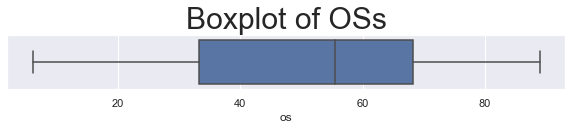

In [12]:
# lets see that visually

plt.figure(figsize = (10, 1))
plt.xticks(rotation=0)
b = sns.boxplot(data = data, x = 'os')
b.axes.set_title("Boxplot of OSs",fontsize=30)
plt.show()
#plt.savefig("OS_boxplot.png", dpi = 300)

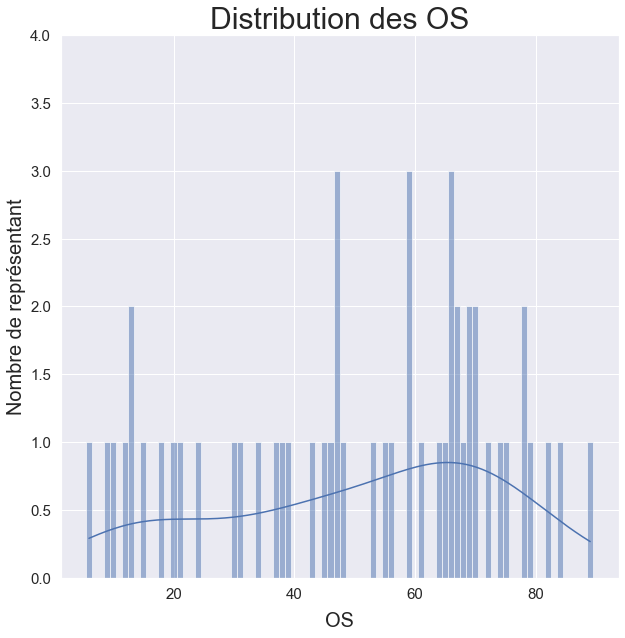

In [13]:
# plot the distribution of the target value

plt.figure(figsize = (10, 10))
plt.xticks(rotation=0)
plt.ylim(0, 4)

b = sns.histplot(data = data, x = 'os', discrete = True, kde = True, bins = len(data['os'].unique()))

b.axes.set_title("Distribution des OS",fontsize=30)
b.set_xlabel("OS",fontsize=20, labelpad = 10)
b.set_ylabel("Nombre de représentant",fontsize=20)
b.tick_params(labelsize=15)

#plt.savefig("OS_distri.png", dpi = 300)

In [14]:
# check correlation betwwen features and target
to_keep = "os"
corr_df = data.corr().drop([col for col in data.columns if (data[col].dtype == 'int64') & (col != to_keep)], axis = 1)
print(abs(corr_df))
#Show a little correlation matrix of the data in the dataset
px.imshow(corr_df, width = 600)

                     os
oms            0.203717
sexe           0.393827
age_au_diag    0.181993
deces_code     0.694220
code_recidive  0.390761
rnascope       0.252384
t              0.045445
m              0.350133
tabac          0.331408
alcool         0.006279
os             1.000000


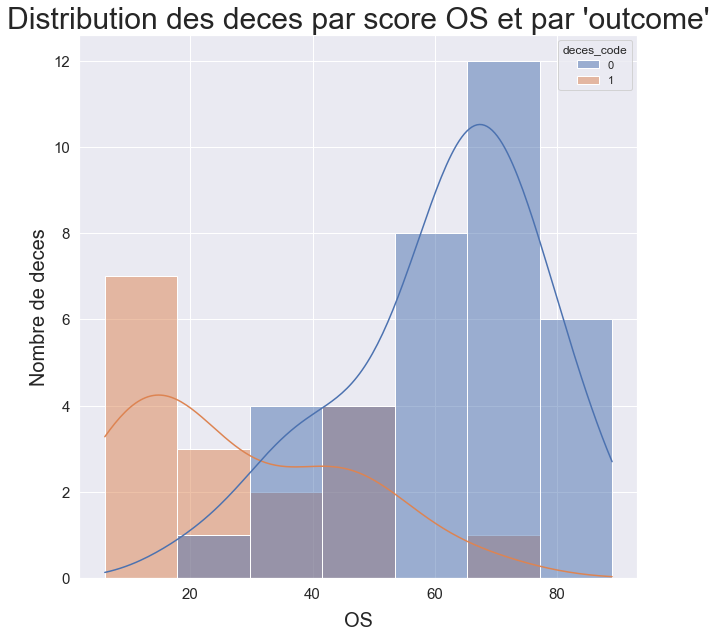

In [15]:
plt.figure(figsize = (10, 10))
plt.xticks(rotation=0)

b = sns.histplot(data = data, x = 'os', hue = 'deces_code', kde=True)
b.axes.set_title("Distribution des deces par score OS et par 'outcome'",fontsize=30)
b.set_xlabel("OS",fontsize=20, labelpad = 10)
b.set_ylabel("Nombre de deces",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

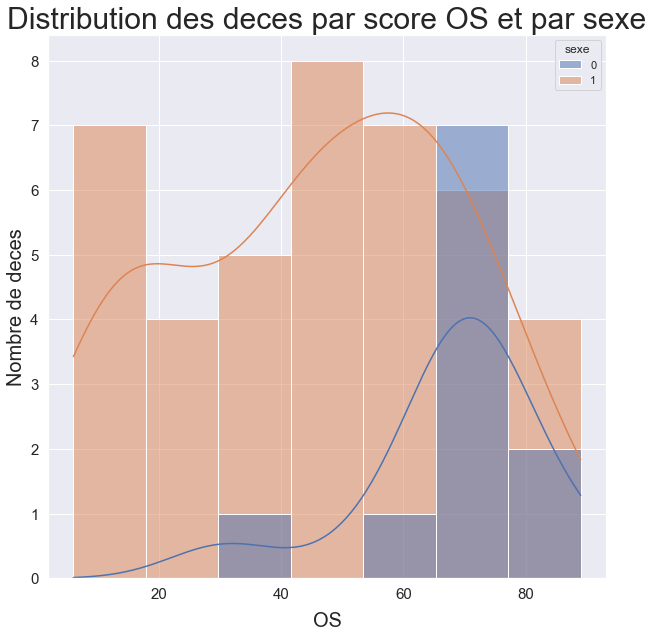

In [16]:
plt.figure(figsize = (10, 10))
plt.xticks(rotation=0)

b = sns.histplot(data = data, x = 'os', hue = 'sexe', kde=True)
b.axes.set_title("Distribution des deces par score OS et par sexe",fontsize=30)
b.set_xlabel("OS",fontsize=20, labelpad = 10)
b.set_ylabel("Nombre de deces",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

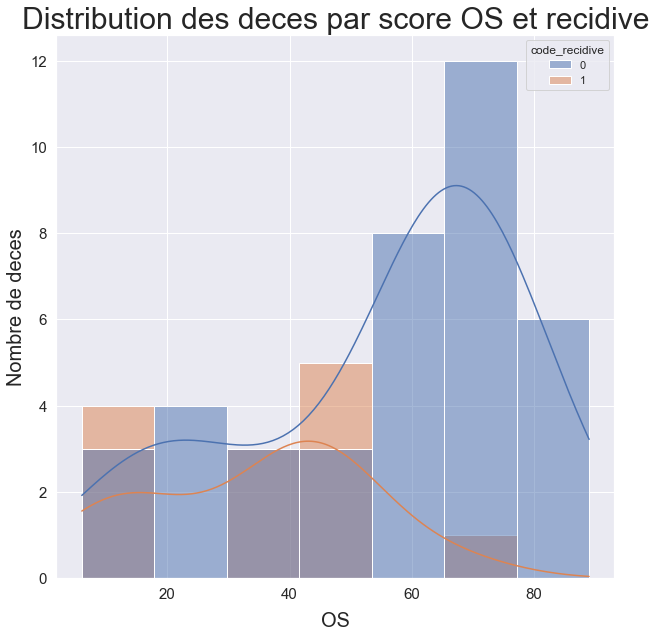

In [17]:
plt.figure(figsize = (10, 10))
plt.xticks(rotation=0)

b = sns.histplot(data = data, x = 'os', hue = 'code_recidive', kde=True)
b.axes.set_title("Distribution des deces par score OS et recidive",fontsize=30)
b.set_xlabel("OS",fontsize=20, labelpad = 10)
b.set_ylabel("Nombre de deces",fontsize=20)
b.tick_params(labelsize=15)
plt.show()